In [276]:
import numpy as np
from scipy import special
import matplotlib.pyplot as plt

In [43]:
%matplotlib inline 

In [ ]:
P_golden_arr = [0.001, 0.005, 0.01, 0.02, 0.05]
P_draft_arr = [0.001, 0.005, 0.01, 0.02, 0.05]

saw_regular_arr = []
saw_gold_arr = []

for P_golden in P_golden_arr:
    for P_draft_card in P_draft_arr:

        #initialize parameters
        saw_regular_morethan1=0
        saw_regular_only1=0
        saw_gold_morethan1=0
        saw_gold_only1=0
        
        #1,000,000 iterations for each parameter set
        for i in range(1000000):
            
            num_golden = np.random.poisson(P_golden)
            #I only use draws where at least one copy is drafted in the deck for efficiency.  
            #This doesn't make any difference in the results.  You could simply remove this requirement
            #and increase the number of iterations used by 10 or 100 to achieve the same results.
            drafted_num=0
            while drafted_num<1:
                drafted_num = np.random.binomial(30,P_draft_card)

            #mark cards as golden or non-golden depending on num_golden
            for j in range(drafted_num):
                if num_golden > 0:
                    draft.append('gold')
                    num_golden-=1
                else:
                    draft.append('non-gold')

            #shuffle order
            np.random.shuffle(draft)

            if card[0]=='non-gold':
                if draft.count('non-gold')+draft.count('gold')>1:
                    saw_regular_morethan1 +=1
                else:
                    saw_regular_only1 +=1

            if card[0]=='gold':
                if draft.count('non-gold')+draft.count('gold')>1:
                    saw_gold_morethan1 +=1
                else:
                    saw_gold_only1 +=1
        
        saw_regular_morethan1_prob = saw_regular_morethan1/float(saw_regular_morethan1+saw_regular_only1)
        saw_gold_morethan1_prob = saw_gold_morethan1/float(saw_gold_morethan1+saw_gold_only1)
        
        saw_regular_arr.append(saw_regular_morethan1_prob)
        saw_gold_arr.append(saw_gold_morethan1_prob)

In [270]:
i=0
print 'p_golden  ','p_draft  ','p_saw_regular  ','p_saw_gold  ','difference  ','ratio'
for P_golden in P_golden_arr:
    for P_draft_card in P_draft_arr:
        print '%.3f       %.3f       %.3f           %.3f      %.3f       %.2f' % \
        (P_golden, P_draft_card, saw_regular_arr[i], saw_gold_arr[i],
         saw_regular_arr[i]-saw_gold_arr[i], saw_regular_arr[i]/saw_gold_arr[i])
        i+=1

p_golden   p_draft   p_saw_regular   p_saw_gold   difference   ratio
0.001       0.001       0.014           0.002      0.012       7.21
0.001       0.005       0.071           0.034      0.037       2.11
0.001       0.010       0.139           0.074      0.065       1.88
0.001       0.020       0.266           0.144      0.121       1.84
0.001       0.050       0.568           0.345      0.224       1.65
0.005       0.001       0.014           0.008      0.007       1.89
0.005       0.005       0.071           0.032      0.039       2.22
0.005       0.010       0.139           0.071      0.067       1.94
0.005       0.020       0.266           0.146      0.119       1.81
0.005       0.050       0.569           0.362      0.207       1.57
0.010       0.001       0.014           0.007      0.008       2.08
0.010       0.005       0.072           0.040      0.032       1.80
0.010       0.010       0.140           0.073      0.067       1.92
0.010       0.020       0.266           0.147  

In [285]:
def binom(k,n,p):
    return special.binom(n,k) * p**k * (1-p)**(n-k)

In [308]:
def pos(k,lam):
    return lam**k * np.e**(-1*lam) / (np.math.factorial(k))

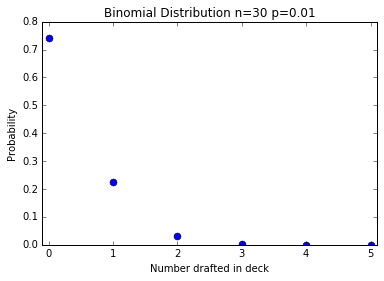

In [332]:
plt.plot(range(0,6),[binom(k,30,0.01) for k in range(0,6)],'bo',ms=7)
plt.xlim(-.1,5.1)
plt.title('Binomial Distribution n=30 p=0.01')
plt.ylabel('Probability')
plt.xlabel('Number drafted in deck')
plt.savefig('binom.png')
plt.show()

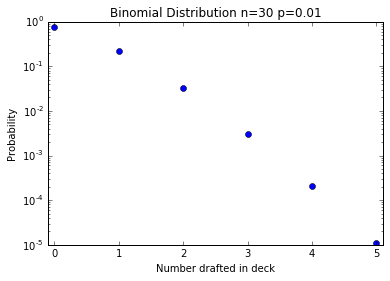

In [307]:
plt.plot(range(0,6),[binom(k,30,0.01) for k in range(0,6)],'bo')
plt.yscale('log')
plt.ylim(1e-5,1)
plt.xlim(-.1,5.1)
plt.title('Binomial Distribution n=30 p=0.01')
plt.ylabel('Probability')
plt.xlabel('Number drafted in deck')
plt.show()

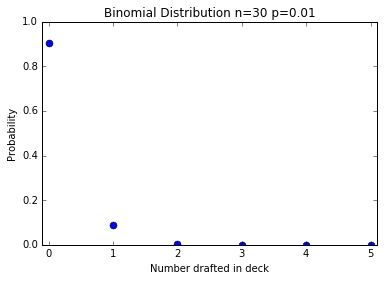

In [314]:
plt.plot(range(0,6),[pos(k,0.1) for k in range(0,6)],'bo',ms=7)
plt.xlim(-.1,5.1)
plt.title('Binomial Distribution n=30 p=0.01')
plt.ylabel('Probability')
plt.xlabel('Number drafted in deck')
plt.show()

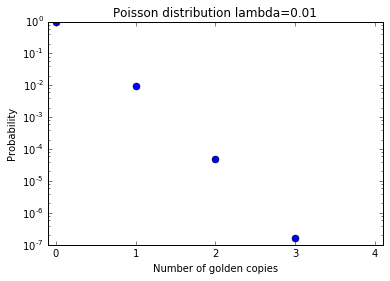

In [331]:
plt.plot(range(0,6),[pos(k,0.01) for k in range(0,6)],'bo',ms=7)
plt.yscale('log')
plt.ylim(1e-7,1)
plt.xlim(-.1,4.1)
plt.title('Poisson distribution lambda=0.01')
plt.ylabel('Probability')
plt.xlabel('Number of golden copies')
plt.savefig('poisson.png')
plt.show()